In [1]:
import sys
import os
# Add "mitsuba" library path to the system path
root = os.path.abspath('../..')
sys.path.insert(0, os.path.abspath(f'{root}/ext/mitsuba3/build/python'))

# Import mitsuba and set the variant
# To set a variant, you need to have set it in the mitsuba.conf file
# https://mitsuba.readthedocs.io/en/latest/src/key_topics/variants.html
import mitsuba as mi
mi.set_variant('llvm_ad_rgb')

# Import the mitsuba-transient extension
# adds extra functionality to existing Mitsuba classes
import mitransient as mitr

In [2]:
# Load XML file
# You can also use mi.load_dict and pass a Python dict object
# but it is probably much easier for your work to use XML files
scene = mi.load_file(os.path.abspath('cornell-box/cbox_mirror.xml'))

# Prepare transient integrator for transient path tracing
# Does the work to initialize the scene before path tracing
transient_integrator = scene.integrator()
transient_integrator.prepare_transient(scene, sensor=0)
# sensor=0 just tells it to use the first sensor in the scene
# (in case there is more than one sensor in the XML file)

# Render the scene and develop the data
# Because mitsuba works with Dr.JIT, this cell will execute
# very fast. But when you actually read the variables
# it will actually start computing everyting (and take a while).
data_steady, data_transient = transient_integrator.render(scene)

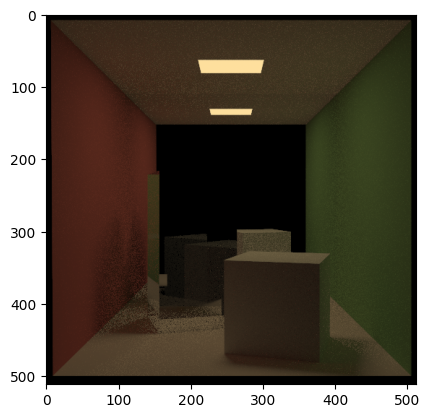

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow((data_steady / np.max(data_steady)) ** (1 / 4.0))
plt.show()

(512, 512, 400, 3)


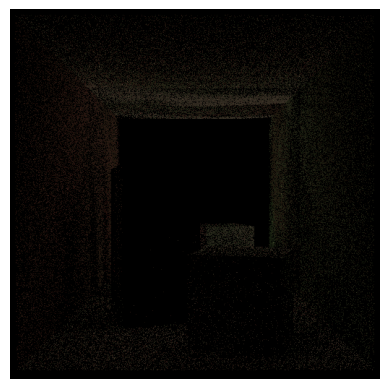

In [4]:
import numpy as np

data_max = np.max(data_transient)

print(data_transient.shape)

mitr.utils.show_video((np.moveaxis(data_transient, 0, 1) / data_max) ** (1.0 / 6.0), 2)